### Student Information
Name: Travis Simelane 

Student ID: 112065425

GitHub ID: @TravisSimelane

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
##### PART 1 ###### 

#SECTION 2 DATA PREPARATION 

#catogories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

#obtain documents containing the catogries provided
from sklearn.datasets import fetch_20newsgroups 

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                 shuffle=True, random_state=42) 

#Have a look at the records contained in the subset of the data 
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [2]:
twenty_train.target_names 

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [3]:
# Return the number of objects in twenty_train subset
len(twenty_train.data)

2257

In [4]:
#Print example from the subset 

#An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [5]:
# Determine Label of above example using target_names key value 
print(twenty_train.target_names[twenty_train.target[0]]) 

#get category of first 10 documents using target keyvalue 
twenty_train.target[0:10]

comp.graphics


array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [6]:
#Get text version of above label of subset of training data 
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [7]:
# print out text data for first 3 samples in the dataset

for t in twenty_train.target[:3]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian


In [8]:
#Converting our dataset into a Pandas dataframe 
import pandas as pd 

#importing functions 
import helpers.data_mining_helpers as dmh

#construct dataframe from a list 
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text']) 

len(X)



2257

In [9]:
#ADDING COLUMNS 

#adding category to the dataframe 
X['category'] = twenty_train.target 

#add Category Label 

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train)) 

#Print modified Table with new caolumns 

X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [10]:
#EXERCISE 2 

#Select 2100 to 2200 record with the text and category name Columns
X.loc[2100:2200,['text', 'category_name']]  

text  \
2100  From: alan@saturn.cs.swin.OZ.AU (Alan Christia...   
2101  From: euclid@mrcnext.cso.uiuc.edu (Euclid K.) ...   
2102  From: healta@saturn.wwc.edu (Tammy R Healy) Su...   
2103  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...   
2104  From: reedr@cgsvax.claremont.edu Subject: Re: ...   
...                                                 ...   
2196  From: kellyb@ccsua.ctstateu.edu Subject: Re: B...   
2197  From: keith@cco.caltech.edu (Keith Allan Schne...   
2198  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...   
2199  From: romdas@uclink.berkeley.edu (Ella I Baff)...   
2200  From: thomas@ramsey.cs.laurentian.ca (F. Thoma...   

               category_name  
2100           comp.graphics  
2101                 sci.med  
2102             alt.atheism  
2103                 sci.med  
2104  soc.religion.christian  
...                      ...  
2196             alt.atheism  
2197             alt.atheism  
2198                 sci.med  
2199                 sci.med  
2200           comp.graphics  

[101 rows x 2 columns]

In [11]:
#EXERCISE 2 

#Select the First and fifth rows for possible comparison
X.loc[[0,5]]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   

            category_name  
0           comp.graphics  
5  soc.religion.christian

In [12]:
#EXERCISE 2

#Selecet every 10th record starting from the last record to going up towars the first
X[2500::-10] 

text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2226  From: nahess@mir.gatech.edu (Nicholas A. Hess)...         1   
2216  Subject: Re: Speculations From: dgraham@bmers3...         0   
...                                                 ...       ...   
46    From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
36    From: keith@cco.caltech.edu (Keith Allan Schne...         0   
26    From: christian@geneva.rutgers.edu Subject: en...         3   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   

               category_name  
2256                 sci.med  
2246  soc.religion.christian  
2236           comp.graphics  
2226           comp.graphics  
2216             alt.atheism  
...                      ...  
46    soc.religion.christian  
36               alt.atheism  
26    soc.religion.christian  
16                   sci.med  
6     soc.religion.christian  

[226 rows x 3 columns]

In [13]:
import numpy as np


NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [14]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
#EXERCISE 5 
# According to the documentation values such as None, np.nan(numpy.NaN) are mapped as True values, which means
# they are null. That is why index 0 and 4 are True. Everything else will be then mapped to False.
# Empty strings '' are not considered missing values and will be mapped as False. That is why index 5 is False 

In [15]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

In [ ]:
#Exercise 6 

#The sample dataframe is no longer in sequential order using the index. The ordering is now random.

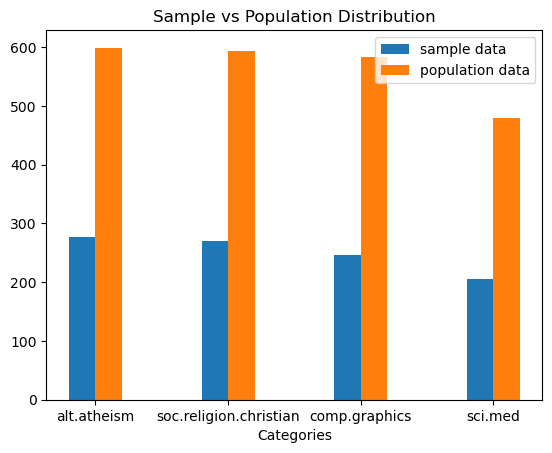

In [16]:
#EXERCISE 8 

import matplotlib.pyplot as plt

ar_sample = np.array(X_sample.category_name.value_counts())
ar_population = np.array(X.category_name.value_counts())
ar_categories = np.array(categories)
dff = pd.DataFrame(ar_sample, ar_population) #Store value counts in data frame

w = 0.2 #Width of each bar
x = categories 
sample = ar_sample 
population = ar_population 

#Generate Sets of x-coordinates for the bars
bar1 = np.arange(len(x)) #sample bar x-coordinates
bar2 = [i+w for i in bar1] #population bar x-coordinates

plt.bar(bar1, sample, w, label="sample data")  
plt.bar(bar2, population, w, label="population data")
plt.xlabel("Categories")
plt.xticks(bar1+w/2, x) #Center the bars
plt.title("Sample vs Population Distribution")
plt.legend()

In [17]:
import nltk
nltk.download('punkt') 

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x)) 

X[0:4]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [19]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [20]:
count_array = X_counts.toarray()
df_Vect = pd.DataFrame(data=count_array, columns = count_vect.get_feature_names_out())
df_Vect

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  zvi  zvonko  zwart  zyeh  zyklon  zyxel  zz  zzz  ªl  \
0          0     0  ...    0       0      0     0       0      0   0    0   0   
1          0     0  ...    0       0      0     0       0      0   0    0   0   
2          0     0  ...    0       0      0     0       0      0   0    0   0   
3          0     0  ...    0       0      2     0       0      0   0    0   0   
4          0     0  ...    0       0      0     0       0      0   0    0   0   
...      ...   ...  ...  ...     ...    ...   ...     ...    ...  ..  ...  ..   
2252       0     0  ...    0       0      0     0       0      0   0    0   0   
2253       0     0  ...    0       0      0     0       0      0   0    0   0   
2254       0     0  ...    0       0      0     0       0      0   0    0   0   
2255       0     0  ...    0       0      0     0       0      0   0    0   0   
2256       0     0  ...    0       0      0     0       0      0   0    0   0   

      íålittin  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2252         0  
2253         0  
2254         0  
2255         0  
2256         0  

[2257 rows x 35788 columns]

In [21]:
count_vect.get_feature_names_out()[0:5]

array(['00', '000', '0000', '0000001200', '000005102000'], dtype=object)

In [22]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [23]:
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [24]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [25]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [26]:
#EXERCISE 10 

count_vect.get_feature_names_out()[37]

'01'

In [27]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']


In [28]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [29]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


term_00  term_000  term_0000  term_0000001200  term_000005102000  \
doc_0         0         0          0                0                  0   
doc_1         0         0          0                0                  0   
doc_2         0         0          0                0                  0   
doc_3         0         0          0                0                  0   
doc_4         1         0          0                0                  0   
doc_5         1         0          0                0                  0   
doc_6         0         0          0                0                  0   
doc_7         0         0          0                0                  0   
doc_8         0         0          0                0                  0   
doc_9         0         0          0                0                  0   
doc_10        0         0          0                0                  0   
doc_11        0         0          0                0                  0   
doc_12        0         0          0                0                  0   
doc_13        0         0          0                0                  0   
doc_14        0         0          0                0                  0   
doc_15        0         0          0                0                  0   
doc_16        0         0          0                0                  0   
doc_17        0         0          0                0                  0   
doc_18        0         0          0                0                  0   
doc_19        0         0          0                0                  0   

        term_0001  term_000100255pixel  term_00014  term_000406  term_0007  \
doc_0           0                    0           0            0          0   
doc_1           0                    0           0            0          0   
doc_2           0                    0           0            0          0   
doc_3           0                    0           0            0          0   
doc_4           0                    0           0            0          0   
doc_5           0                    0           0            0          0   
doc_6           0                    0           0            0          0   
doc_7           0                    0           0            0          0   
doc_8           0                    0           0            0          0   
doc_9           0                    0           0            0          0   
doc_10          0                    0           0            0          0   
doc_11          0                    0           0            0          0   
doc_12          0                    0           0            0          0   
doc_13          0                    0           0            0          0   
doc_14          0                    0           0            0          0   
doc_15          0                    0           0            0          0   
doc_16          0                    0           0            0          0   
doc_17          0                    0           0            0          0   
doc_18          0                    0           0            0          0   
doc_19          0                    0           0            0          0   

        term_000usd  term_0010  term_001004  term_0010580b  term_001125  \
doc_0             0          0            0              0            0   
doc_1             0          0            0              0            0   
doc_2             0          0            0              0            0   
doc_3             0          0            0              0            0   
doc_4             0          0            0              0            0   
doc_5             0          0            0              0            0   
doc_6             0          0            0              0            0   
doc_7             0          0            0              0            0   
doc_8             0          0            0              0            0   
doc_9             0   

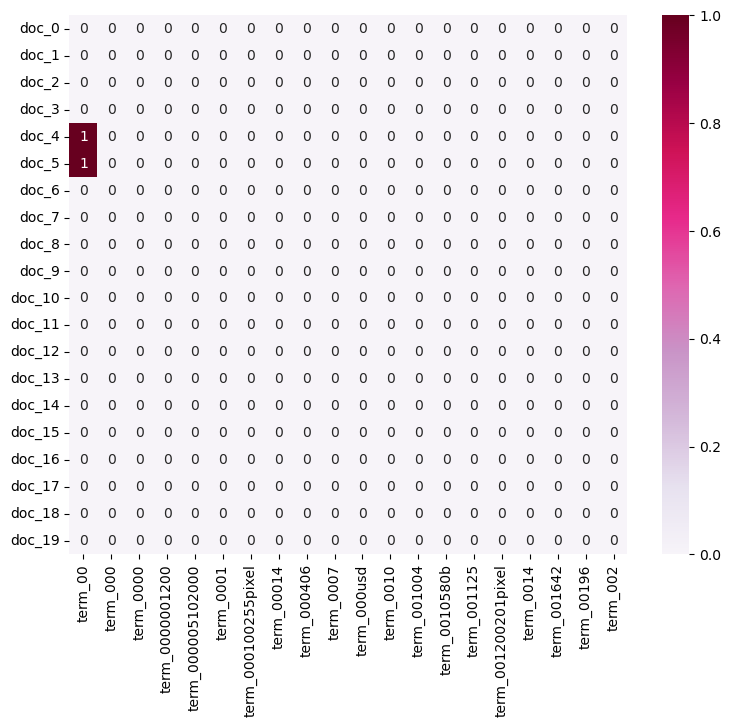

In [30]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

the  of  to  and  is  in  that  it  you  for  ...  but  or  if  was  \
doc_0     1   1   4    2   2   3     3   1    2    1  ...    2   1   1    1   
doc_1     1   0   0    0   0   0     0   1    0    0  ...    1   1   0    1   
doc_2     2   0   0    0   0   0     0   1    0    0  ...    0   1   0    4   
doc_3     1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_4     1   0   0    0   0   0     0   1    0    0  ...    0   1   1    0   
doc_5     1   0   0    1   0   0     0   1    0    0  ...    0   1   0    0   
doc_6     2   0   0    0   0   0     0   1    0    0  ...    1   1   0    0   
doc_7     4   0   0    0   0   0     0   1    0    0  ...    0   1   1    0   
doc_8     1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_9     1   0   0    0   0   0     0   1    0    0  ...    1   1   0    0   
doc_10    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    8   
doc_11    1   0   0    0   0   0     0   1    0    0  ...    1   1   0    1   
doc_12    6   0   0    0   0   0     0   1    0    0  ...    1   1   0    1   
doc_13    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_14    2   0   0    0   0   0     0   1    0    1  ...    2   1   0    0   
doc_15    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_16    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_17    1   0   0    0   0   0     0   1    0    0  ...    1   1   0    0   
doc_18    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_19    1   0   0    0   0   0     0   1    0    0  ...    2   1   0    0   
doc_20    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_21    2   0   0    0   0   0     0   1    0    0  ...    0   1   0    2   
doc_22    1   0   0    0   0   0     0   2    0    0  ...    0   1   0    1   
doc_23    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_24    3   0   0    4   4   1     0   1    0    0  ...    1   1   0    1   
doc_25    2   0   0    0   0   0     0   1    0    0  ...    1   1   0    0   
doc_26    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_27    2   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_28    2   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   
doc_29    1   0   0    0   0   0     0   1    0    0  ...    0   1   0    0   

        can  we  there  by  what  subject  
doc_0     1   1      1   1     1        1  
doc_1     0   1      8   0     0        0  
doc_2     0   2     10   1     0        0  
doc_3     1   0      2   0     0        0  
doc_4     0   0      3   0     0        0  
doc_5     0   0      6   0     1        0  
doc_6     0   1      7   2     0        0  
doc_7     0   1     11   1     0        0  
doc_8     0   0      4   0     0        0  
doc_9     0   0      6   1     0        0  
doc_10    1   2     22   0     2        0  
doc_11    0   0      3   0     0        0  
doc_12    0   3     22  11     2        0  
doc_13    0   0      3   0     0        0  
doc_14    0   0      3   0     0        0  
doc_15    0   0      1   0     0        0  
doc_16    0   0      3   1     0        0  
doc_17    0   0      0   0     0        0  
doc_18    2   0      1   0     0        0  
doc_19    0   0      3   0     0        0  
doc_20    0   2      2   0     0        0  
doc_21    1   1     11   1     2        0  
doc_22    0   0      2   1     0        0  
doc_23    0   0      0   0     0        0  
doc_24    0   0      4   0     0        1  
doc_25    0   0      4   0     0        0  
doc_26    0   0      1   0     0        0  
doc_27    0   1      3   0     0        0  
doc_28    1   0      6   0     0        0  
doc_29    0   1      2   0     0        0  

[30 rows x 30 columns]

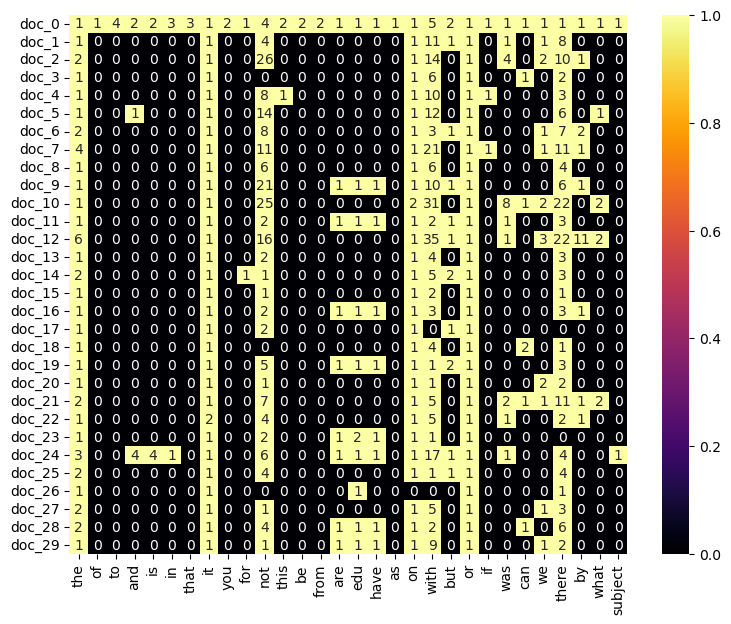

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sum word counts over all rows
term_frequencies = X_counts.sum(axis=0)

#sort in descending order
word_frequency = [(term, term_frequencies[0, index], index) for term, index in count_vect.vocabulary_.items()]
word_frequency =sorted(word_frequency, key = lambda x: x[1], reverse=True)

indices = [index for term, index in count_vect.vocabulary_.items()]
plot_x = [w[0] for w in word_frequency[0:30]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z = X_counts[0:30][:, indices[0:30]].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="inferno",
                 vmin=0, vmax=1, annot=True)

(2257, 35788)
(2257, 2)


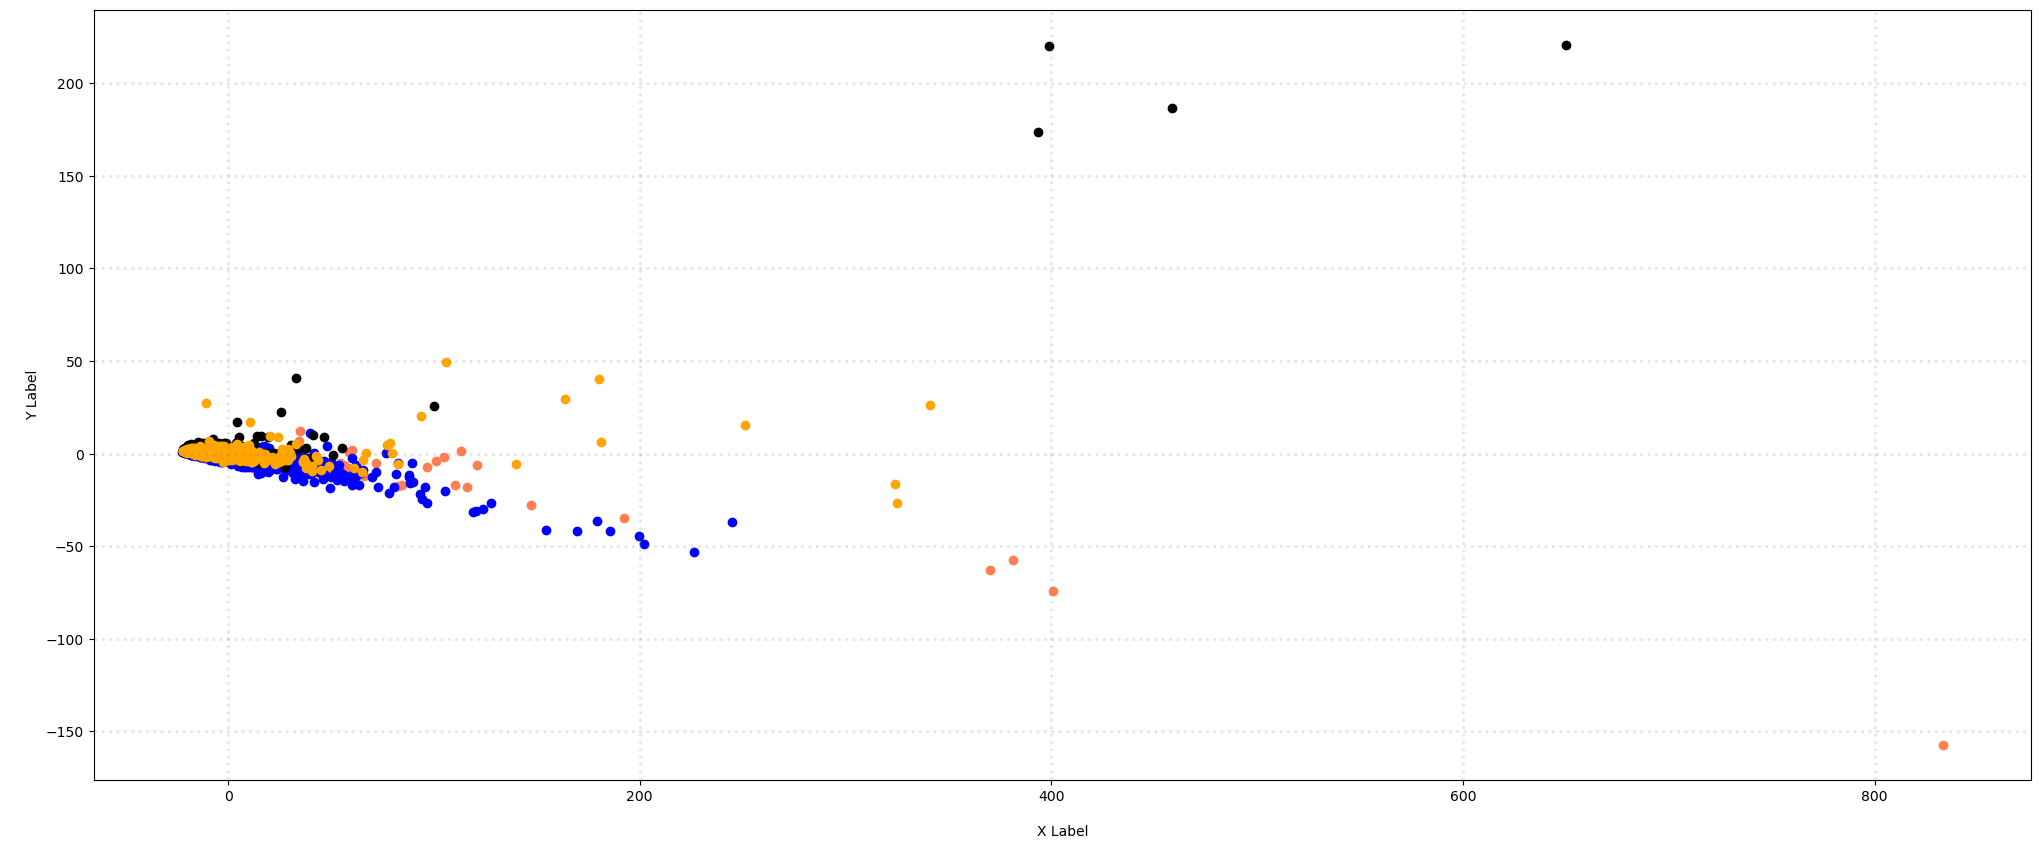

In [32]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape) 

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2257, 35788)
(2257, 3)
[[-17.01172954   0.45016637  -1.31226077]
 [ -6.80574586  -1.15880601  -0.40488276]
 [ 15.79461065   3.62233097  12.70799059]
 ...
 [ 19.97508176  -2.85495806   1.04076599]
 [163.88523745  29.52467711  -8.70178793]
 [-16.58569528   0.61748552  -1.88007227]]


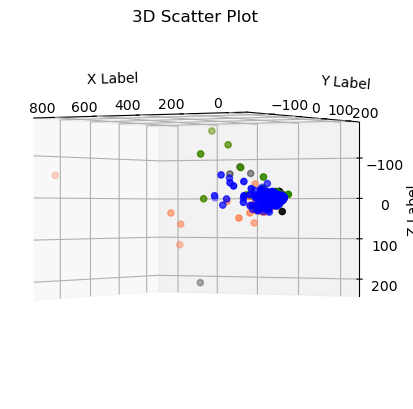

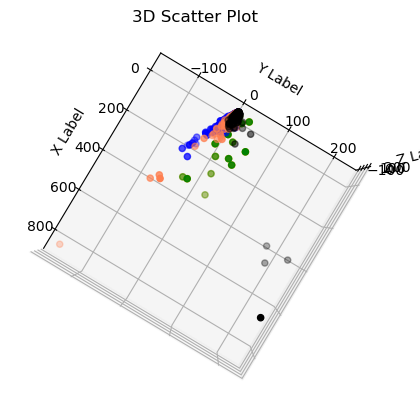

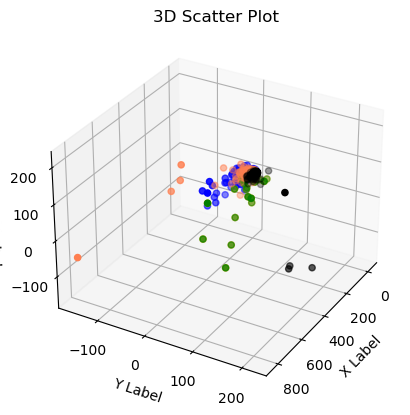

In [33]:
#EXERCISE 12  
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
print(X_reduced) 

# plot 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    x = X_reduced[X['category_name'] == category].T[0]
    y = X_reduced[X['category_name'] == category].T[1]
    z = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=180, azim=60)

# plot 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    x = X_reduced[X['category_name'] == category].T[0]
    y = X_reduced[X['category_name'] == category].T[1]
    z = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=90, azim=30)

# plot3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, categories):
    x = X_reduced[X['category_name'] == category].T[0]
    y = X_reduced[X['category_name'] == category].T[1]
    z = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=30, azim=30)

plt.show()

In [34]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


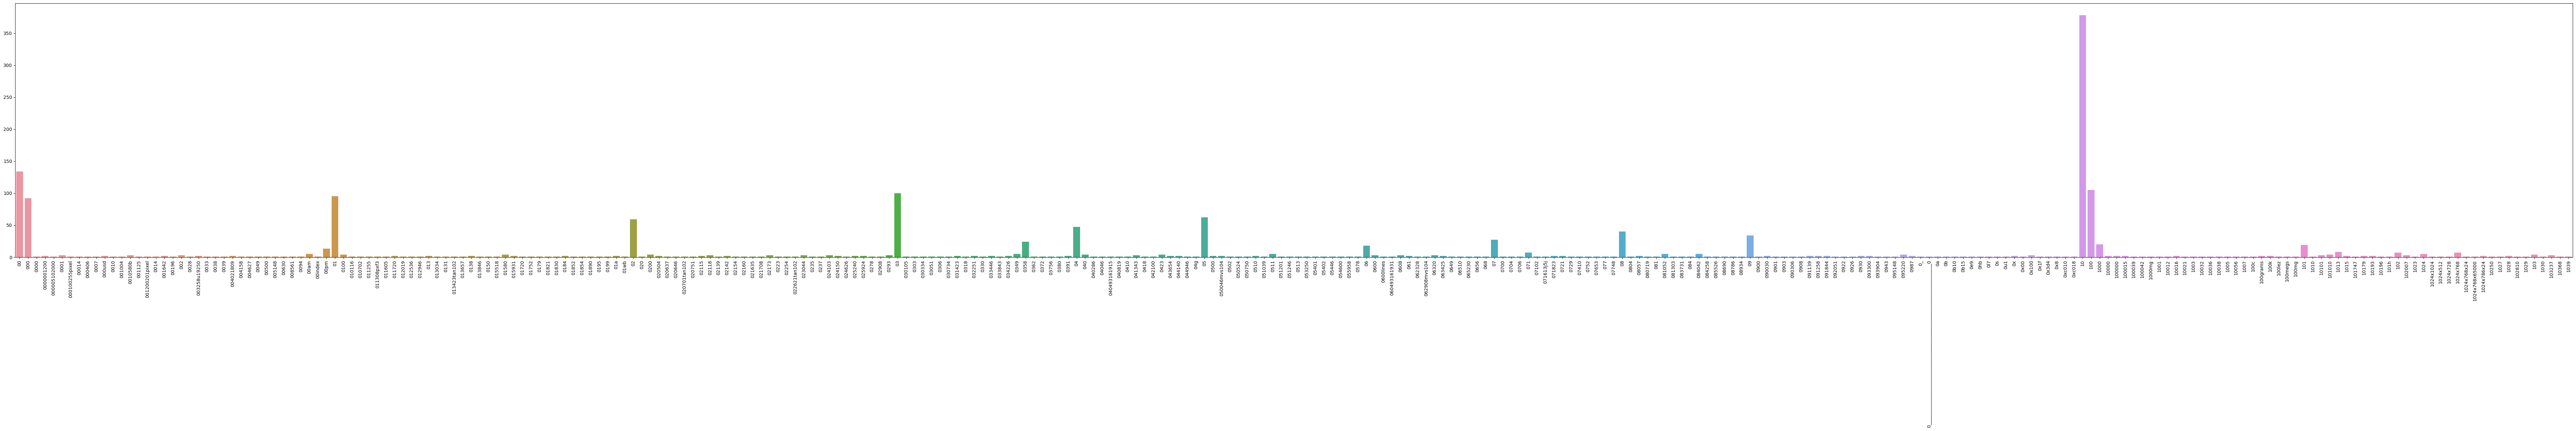

In [35]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] 

term_frequencies[0] 

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [36]:
#EXERCISE 13 
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:50], y=term_frequencies[:50], title='Interactive Bar Plot')

fig.update_traces(marker_color='blue') 
fig.update_xaxes(title_text='Categories')  
fig.update_yaxes(title_text='Values')  

fig.show()

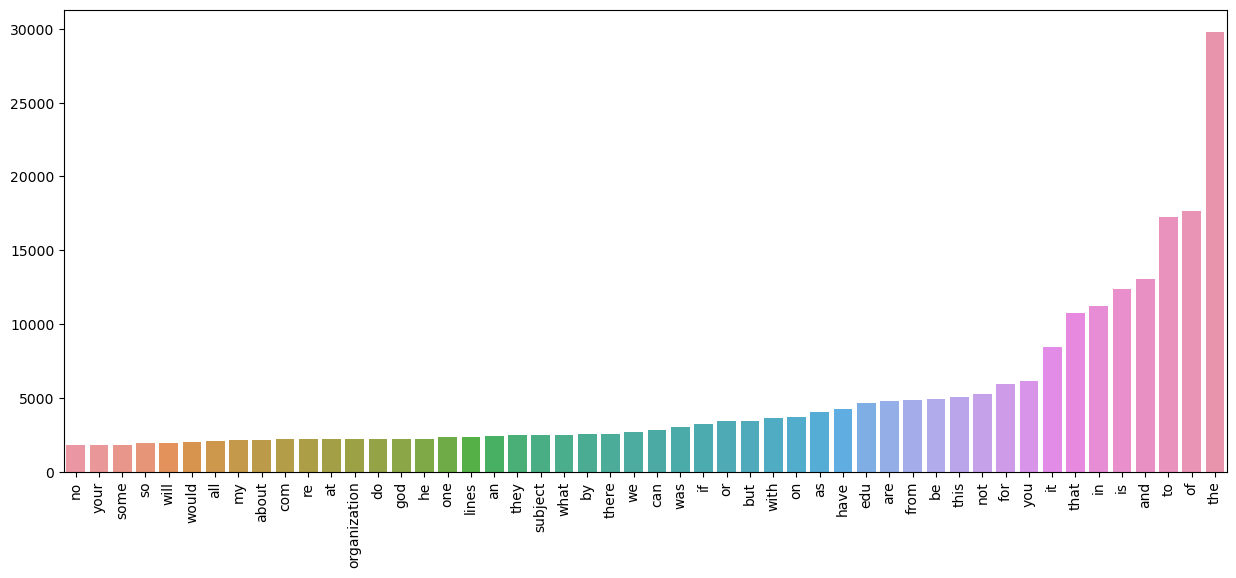

In [37]:
#EXERCISE 14
term_frequencies = np.array(X_counts.sum(axis=0))[0] #Calculate the sum frequesncies along the column axis

# Create a list of top 50 terms based on frequency
top_n_terms = 50
top_term_indices = np.argsort(term_frequencies)[-top_n_terms:] #Sort term frequescies in ascending order and select last top_n_terms
top_term_indices = [int(i) for i in top_term_indices]  #Convert indexes to integers

top_term_frequencies = [term_frequencies[i] for i in top_term_indices]
top_terms = [count_vect.get_feature_names_out()[i] for i in top_term_indices]

plt.subplots(figsize=(15, 6))  
g = sns.barplot(x=top_terms, y=top_term_frequencies)
g.set_xticklabels(top_terms, rotation=90)

plt.show()

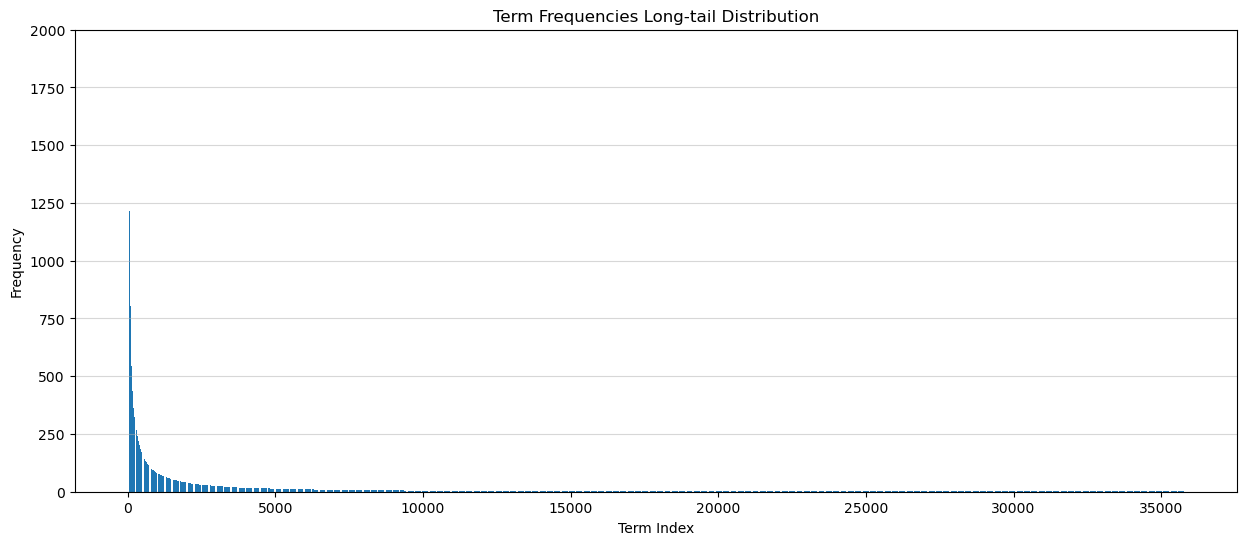

In [38]:
#EXERCISE 15 Bargraph sorted by Decreasing order To represent long-tail
import matplotlib.pyplot as plt

#Store Term frequesncies as array
term_frequencies = np.array(X_counts.sum(axis=0))[0]

# Sort term frequencies in decreasing order
sorted_indices = term_frequencies.argsort()[::-1]
sorted_frequencies = term_frequencies[sorted_indices]

plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_frequencies)), sorted_frequencies)
plt.title('Term Frequencies Long-tail Distribution')
plt.xlabel('Term Index')
plt.ylabel('Frequency')
plt.ylim(0, 2000)  # Set the y-axis limit to 5000
plt.grid(axis='y', alpha=0.5)

plt.show()


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

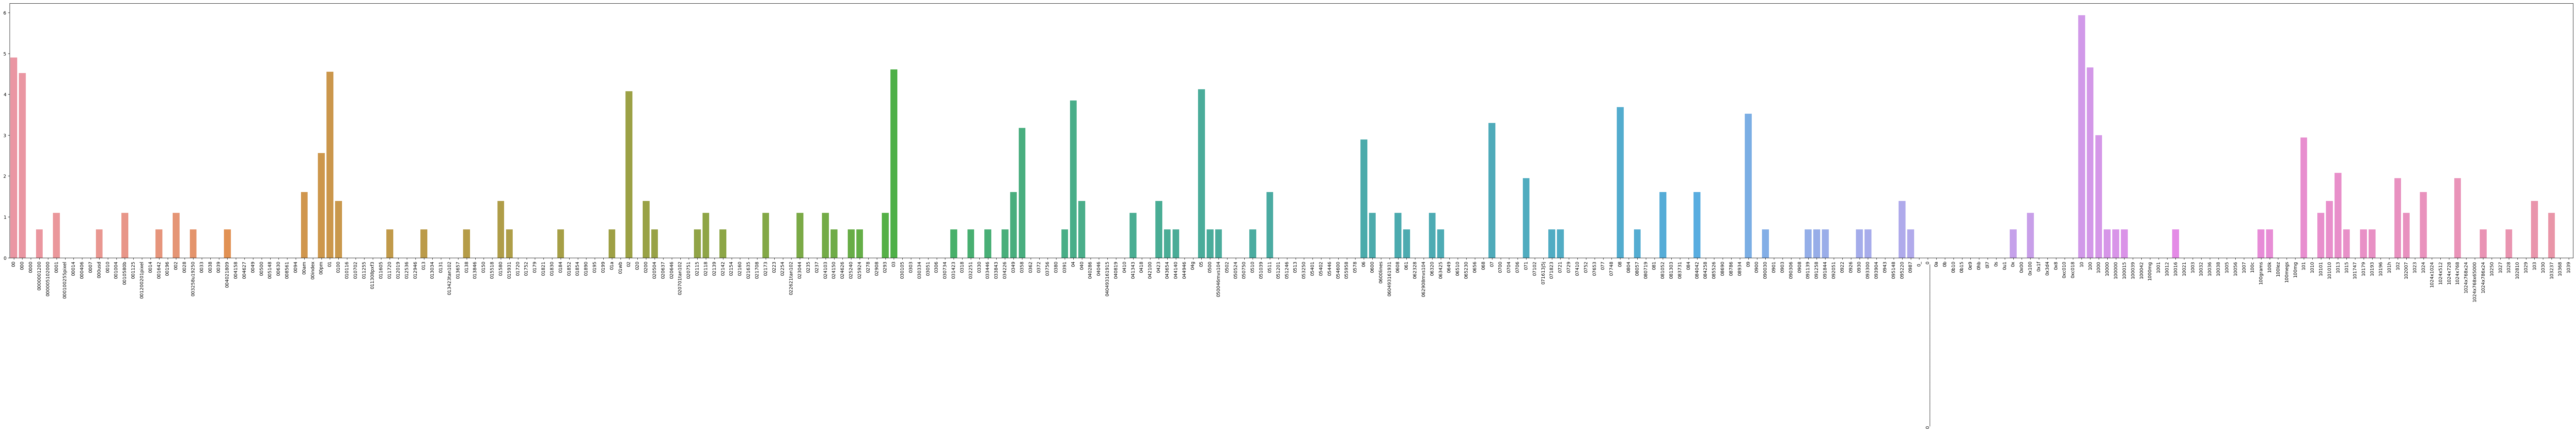

In [39]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [40]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy 

mlb = preprocessing.LabelBinarizer() 

mlb.fit(X.category) 

X['bin_category'] = mlb.transform(X['category']).tolist() 
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

In [41]:
#Exercise 16 Binarization using Category_name which works just fine. 

mlb.fit(X.category_name) 

X['bin_category_name'] = mlb.transform(X['category_name']).tolist() 
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

In [42]:
#We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3) 

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [43]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


################# PART 2 - NEW DATA SET ################# 

In [45]:
import pandas as pd
import zipfile

local_zip_file = "sentiment+labelled+sentences.zip"

# Unzip the downloaded file into folder called sentiment_dataset
with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
    zip_ref.extractall("sentiment_dataset")

#file paths list in the zip 
file_paths = ["sentiment_dataset/sentiment labelled sentences/imdb_labelled.txt",
              "sentiment_dataset/sentiment labelled sentences/amazon_cells_labelled.txt",
              "sentiment_dataset/sentiment labelled sentences/yelp_labelled.txt"] 

# Create an empty list to hold DataFrames to be cancated 
dfs = []

# Read each file and append it to the list of DataFrames
for file_path in file_paths:
    df = pd.read_csv(file_path, sep='\t', header=None, names=["text", "sentiment"])
    dfs.append(df)

# Concatenate the list of DataFrames into one DataFrame
usr = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the DataFrame
print(usr.head(20)) 

                                                 text  sentiment
0   A very, very, very slow-moving, aimless movie ...          0
1   Not sure who was more lost - the flat characte...          0
2   Attempting artiness with black & white and cle...          0
3        Very little music or anything to speak of.            0
4   The best scene in the movie was when Gerardo i...          1
5   The rest of the movie lacks art, charm, meanin...          0
6                                 Wasted two hours.            0
7   Saw the movie today and thought it was a good ...          1
8                                A bit predictable.            0
9   Loved the casting of Jimmy Buffet as the scien...          1
10               And those baby owls were adorable.            1
11  The movie showed a lot of Florida at it's best...          1
12  The Songs Were The Best And The Muppets Were S...          1
13                                  It Was So Cool.            1
14  This is a very "right

In [46]:
sentiments = ['Positive', 'Negative']

#Add User Sentiments Column
usr['sentiment_name'] = usr['sentiment'].map({1: 'Positive', 0: 'Negative'})  

usr.text[2057]

'I did not expect this to be so good!'

In [47]:
len(usr)

2748

In [48]:
usr[0:2]

text  sentiment sentiment_name
0  A very, very, very slow-moving, aimless movie ...          0       Negative
1  Not sure who was more lost - the flat characte...          0       Negative

In [49]:
for t in usr["text"][:3]:
    print(t)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  


In [50]:
#Simple Query 
usr[:10][["text","sentiment_name"]]

text sentiment_name
0  A very, very, very slow-moving, aimless movie ...       Negative
1  Not sure who was more lost - the flat characte...       Negative
2  Attempting artiness with black & white and cle...       Negative
3       Very little music or anything to speak of.         Negative
4  The best scene in the movie was when Gerardo i...       Positive
5  The rest of the movie lacks art, charm, meanin...       Negative
6                                Wasted two hours.         Negative
7  Saw the movie today and thought it was a good ...       Positive
8                               A bit predictable.         Negative
9  Loved the casting of Jimmy Buffet as the scien...       Positive

In [51]:
#Query last 10 
usr[-10:]

text  sentiment  \
2738  The refried beans that came with my meal were ...          0   
2739         Spend your money and time some place else.          0   
2740  A lady at the table next to us found a live gr...          0   
2741            the presentation of the food was awful.          0   
2742           I can't tell you how disappointed I was.          0   
2743  I think food should have flavor and texture an...          0   
2744                           Appetite instantly gone.          0   
2745  Overall I was not impressed and would not go b...          0   
2746  The whole experience was underwhelming, and I ...          0   
2747  Then, as if I hadn't wasted enough of my life ...          0   

     sentiment_name  
2738       Negative  
2739       Negative  
2740       Negative  
2741       Negative  
2742       Negative  
2743       Negative  
2744       Negative  
2745       Negative  
2746       Negative  
2747       Negative

In [52]:
# using loc (by label) every tenth record
usr.loc[::10, 'text']

0       A very, very, very slow-moving, aimless movie ...
10                   And those baby owls were adorable.  
20      This if the first movie I've given a 10 to in ...
30                          The problem was the script.  
40      Frankly, after Cotton club and Unfaithful, it ...
                              ...                        
2700    The ambiance here did not feel like a buffet s...
2710    She was quite disappointed although some blame...
2720    Unfortunately, it only set us up for disapppoi...
2730                              Food was below average.
2740    A lady at the table next to us found a live gr...
Name: text, Length: 275, dtype: object

In [53]:
# using iloc (by position)
usr.iloc[:10, 0]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                  Wasted two hours.  
7    Saw the movie today and thought it was a good ...
8                                 A bit predictable.  
9    Loved the casting of Jimmy Buffet as the scien...
Name: text, dtype: object

In [54]:
#EXERCISE 2 

#Select every 10th record starting from the last record to going up towars the first
usr[::-10]

text  sentiment  \
2747  Then, as if I hadn't wasted enough of my life ...          0   
2737  I would avoid this place if you are staying in...          0   
2727  I kept looking at the time and it had soon bec...          0   
2717  I don't know what the big deal is about this p...          0   
2707  The only reason to eat here would be to fill u...          0   
...                                                 ...        ...   
47      An hour and a half I wish I could bring back.            0   
37    Ursula Burton's portrayal of the nun is both t...          1   
27                              It is a true classic.            1   
17    I'll put this gem up against any movie in term...          1   
7     Saw the movie today and thought it was a good ...          1   

     sentiment_name  
2747       Negative  
2737       Negative  
2727       Negative  
2717       Negative  
2707       Negative  
...             ...  
47         Negative  
37         Positive  
27         Positive  
17         Positive  
7          Positive  

[275 rows x 3 columns]

In [55]:
#EXERCISE 3 

#Fetch first 10 records that have the sentiment_name Positive and query every tenth record 

usr[usr['sentiment_name'] == 'Positive'].iloc[::10][0:10]

text  sentiment  \
4    The best scene in the movie was when Gerardo i...          1   
18   It's practically perfect in all of them  a tr...          1   
29                    Definitely worth checking out.            1   
57   Some applause should be given to the "prelude"...          1   
83   This is definitely a cult classic well worth v...          1   
142  So for our enjoyment we get to see them run ar...          1   
158                Now you know why I gave it a 10+!            1   
168  I am so pleased to know such a modern day geni...          1   
190  Here, in The Wind and the Lion, we see a wonde...          1   
203  For people who are first timers in film making...          1   

    sentiment_name  
4         Positive  
18        Positive  
29        Positive  
57        Positive  
83        Positive  
142       Positive  
158       Positive  
168       Positive  
190       Positive  
203       Positive

In [56]:
# check missing values
usr.isnull()

text  sentiment  sentiment_name
0     False      False           False
1     False      False           False
2     False      False           False
3     False      False           False
4     False      False           False
...     ...        ...             ...
2743  False      False           False
2744  False      False           False
2745  False      False           False
2746  False      False           False
2747  False      False           False

[2748 rows x 3 columns]

In [57]:
import helpers.data_mining_helpers as dmh

usr.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                       sentiment_name  
0  The amoung of missing records is:   
1                                   0

In [58]:
#EXERCISE 5 Calculate missing value inevery record 

usr.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [59]:
#Check for duplicates
usr.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [60]:
#Sum of Duplicated Records 
sum(usr.duplicated())

17

In [61]:
#Remomve Duplicates 
usr.drop_duplicates(keep=False, inplace=True)  

len(usr)

2714

In [62]:
print(usr.shape)
usr_sample = usr.sample(n=400,random_state=42) #random state
display(usr_sample)

(2714, 3)


text  sentiment  \
511   Every time he opened his mouth you expect to h...          0   
2040  The staff is great, the food is delish, and th...          1   
1933  I ordered the Lemon raspberry ice cocktail whi...          1   
940   Lately they have been extremely nice and helpf...          1   
2711  After all the rave reviews I couldn't wait to ...          0   
...                                                 ...        ...   
104   NOBODY identifies with these characters becaus...          0   
2481        Overall, I like there food and the service.          1   
262   I know he was a contract player with little co...          0   
98                Yeah, the movie pretty much sucked.            0   
254   The plot doesn't hang together at all, and the...          0   

     sentiment_name  
511        Negative  
2040       Positive  
1933       Positive  
940        Positive  
2711       Negative  
...             ...  
104        Negative  
2481       Positive  
262        Negative  
98         Negative  
254        Negative  

[400 rows x 3 columns]

In [63]:
len(usr_sample)

400

In [64]:
usr_sample[0:10]

text  sentiment  \
511   Every time he opened his mouth you expect to h...          0   
2040  The staff is great, the food is delish, and th...          1   
1933  I ordered the Lemon raspberry ice cocktail whi...          1   
940   Lately they have been extremely nice and helpf...          1   
2711  After all the rave reviews I couldn't wait to ...          0   
285   I have seen many movies starring Jaclyn Smith,...          1   
419   The characters are interesting and you really ...          1   
2477         As for the service, I thought it was good.          1   
2402            The patio seating was very comfortable.          1   
2303  I know this is not like the other restaurants ...          0   

     sentiment_name  
511        Negative  
2040       Positive  
1933       Positive  
940        Positive  
2711       Negative  
285        Positive  
419        Positive  
2477       Positive  
2402       Positive  
2303       Negative

In [ ]:
#Exercise 6 Difference observed between the sample data and the population data  
#The sample is no longer ordered by the index as the population was. 

sentiment_name
Negative    218
Positive    182
Name: count, dtype: int64


Text(0, 0.5, 'Count')

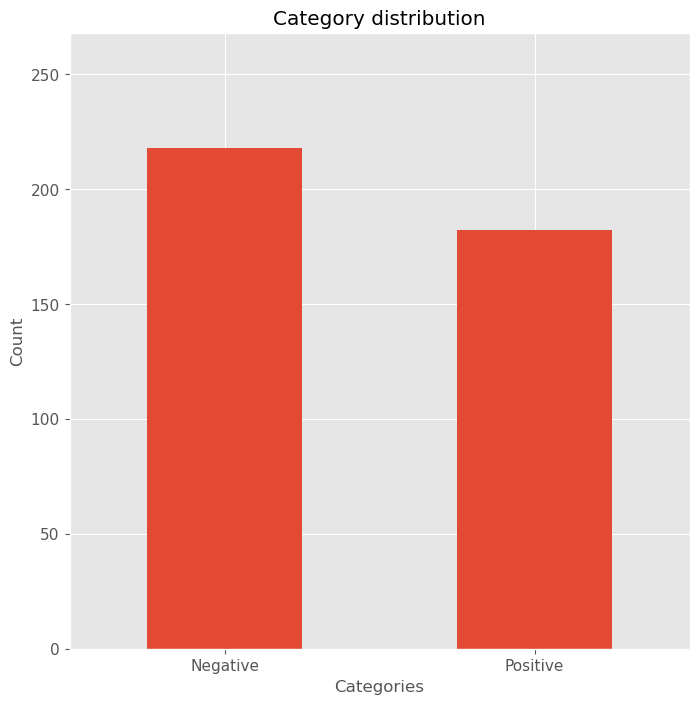

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline 

print(usr_sample.sentiment_name.value_counts()) 

plt.style.use('ggplot')

# plot barchart for usr_sample
upper_bound = max(usr_sample.sentiment_name.value_counts() + 50) #Defining maximum
ax = usr_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,8)) 

# Set x and y axis labels
ax.set_xlabel("Categories")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

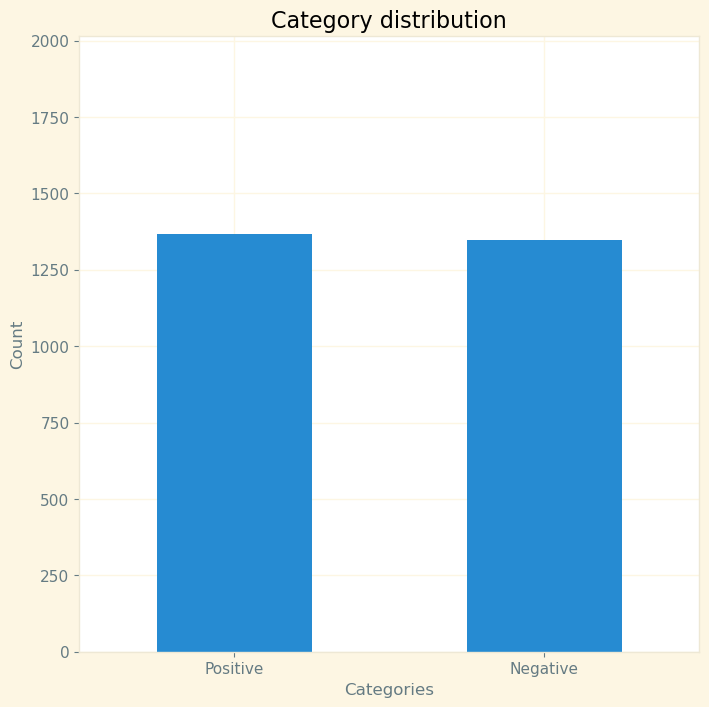

In [66]:
#Plot Bar graph For Population to compare distribution   

plt.style.use('Solarize_Light2')

upper_bound = max(usr.sentiment_name.value_counts() + 650) #Defining maximum
ax = usr.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,8)) 
ax.set_facecolor('white')
# Set x and y axis labels
ax.set_xlabel("Categories")
ax.set_ylabel("Count")

Text(0.5, 1.0, 'Sample vs Population Distribution')

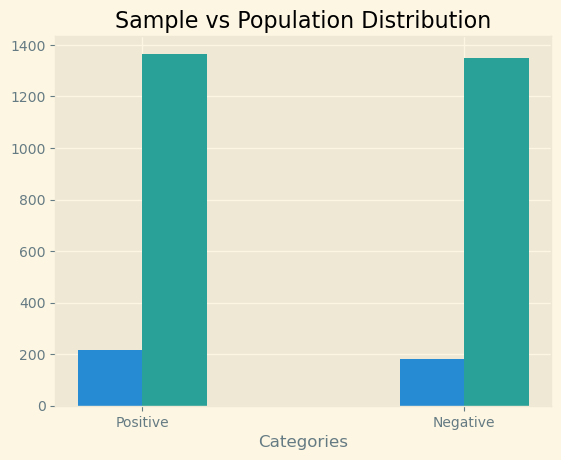

In [69]:
#EXERCISE 8 Compare Sample and Population Distribution on Barplt 

import numpy as np 

ar_sample = np.array(usr_sample.sentiment_name.value_counts())#sample value counts stored in array  
ar_population = np.array(usr.sentiment_name.value_counts()) #sample value counts stored in array 

ar_sample 

ar_sentiment_name = np.array(usr.sentiment_name) #Store sentiment_names in array 
dff = pd.DataFrame(ar_sample, ar_population) #Dataframe populated with value counts  

lst_sample = usr_sample.sentiment_name.value_counts()
lst_population = usr.sentiment_name.value_counts() 

sentiment_name = ['Positive', 'Negative']

w=0.2 
x=sentiment_name 
sample = ar_sample 
population = ar_population 

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

ax.set_facecolor('white') 

plt.bar(bar1, sample, w, label="sample data")  
plt.bar(bar2, population, w, label="population data")
plt.xlabel("Categories")
plt.xticks(bar1+w/2, x)
plt.title("Sample vs Population Distribution")

In [70]:
import nltk
nltk.download('punkt')

usr['unigrams'] = usr['text'].apply(lambda x: dmh.tokenize_text(x))
usr[0:5]["unigrams"] 

usr[0:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  sentiment  \
0  A very, very, very slow-moving, aimless movie ...          0   
1  Not sure who was more lost - the flat characte...          0   
2  Attempting artiness with black & white and cle...          0   
3       Very little music or anything to speak of.            0   
4  The best scene in the movie was when Gerardo i...          1   

  sentiment_name                                           unigrams  
0       Negative  [A, very, ,, very, ,, very, slow-moving, ,, ai...  
1       Negative  [Not, sure, who, was, more, lost, -, the, flat...  
2       Negative  [Attempting, artiness, with, black, &, white, ...  
3       Negative  [Very, little, music, or, anything, to, speak,...  
4       Positive  [The, best, scene, in, the, movie, was, when, ...

In [71]:
list(usr[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
usr_counts = count_vect.fit_transform(usr.text) #learn the vocabulary and return document-term matrix
print(usr_counts.shape)
print(usr_counts[0])

(2714, 5153)
  (0, 4888)	3
  (0, 4131)	1
  (0, 2955)	1
  (0, 166)	1
  (0, 2953)	1
  (0, 75)	1
  (0, 1330)	1
  (0, 1400)	1
  (0, 5137)	1
  (0, 2763)	1


In [73]:
count_vect.get_feature_names_out()[2581]

'laughed'

In [74]:
analyze = count_vect.build_analyzer()
analyze(usr.text[100])

['if',
 'you',
 'do',
 'go',
 'see',
 'this',
 'movie',
 'bring',
 'pillow',
 'or',
 'girlfriend',
 'boyfriend',
 'to',
 'keep',
 'you',
 'occupied',
 'through',
 'out']

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
usr_counts = count_vect.fit_transform(usr.text) #learn the vocabulary and return document-term matrix
print(usr_counts.shape)
print(usr_counts[0])

(2714, 5153)
  (0, 4888)	3
  (0, 4131)	1
  (0, 2955)	1
  (0, 166)	1
  (0, 2953)	1
  (0, 75)	1
  (0, 1330)	1
  (0, 1400)	1
  (0, 5137)	1
  (0, 2763)	1


In [76]:
count_vect.get_feature_names_out()[4131]

'slow'

In [77]:
analyze = count_vect.build_analyzer()
analyze(usr.text[0])

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [78]:
count_array = usr_counts.toarray()
df_Vect = pd.DataFrame(data=count_array, columns = count_vect.get_feature_names_out())
df_Vect

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2709   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2710   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2711   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2712   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2713   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2709      0    0      0     0        0       0        0  
2710      0    0      0     0        0       0        0  
2711      0    0      0     0        0       0        0  
2712      0    0      0     0        0       0        0  
2713      0    0      0     0        0       0        0  

[2714 rows x 5153 columns]

In [79]:
#EXERCISE 9 

analyze(usr.text[0])

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [80]:
analyze(" ".join(list(usr[:1].text)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [81]:
# We can check the shape of this matrix by:
usr_counts.shape

(2714, 5153)

In [82]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [83]:
# we convert from sparse array to normal array
usr_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [84]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [85]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x) 

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(usr.index)[0:20]]
print(plot_y) 

plot_z = usr_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0

term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
doc_0         0        0         0        0        0        0        0   
doc_1         0        0         0        0        0        0        0   
doc_2         0        0         0        0        0        0        0   
doc_3         0        0         0        0        0        0        0   
doc_4         0        0         0        0        0        0        0   
doc_5         0        0         0        0        0        0        0   
doc_6         0        0         0        0        0        0        0   
doc_7         0        0         0        0        0        0        0   
doc_8         0        0         0        0        0        0        0   
doc_9         0        0         0        0        0        0        0   
doc_10        0        0         0        0        0        0        0   
doc_11        0        0         0        0        0        0        0   
doc_12        0        0         0        0        0        0        0   
doc_13        0        0         0        0        0        0        0   
doc_14        0        0         0        0        0        0        0   
doc_15        0        0         0        0        0        0        0   
doc_16        0        0         0        0        0        0        0   
doc_17        0        0         0        0        0        0        0   
doc_18        0        0         0        0        0        0        0   
doc_19        0        1         0        0        0        1        0   

        term_15g  term_15pm  term_17  term_18  term_18th  term_1928  \
doc_0          0          0        0        0          0          0   
doc_1          0          0        0        0          0          0   
doc_2          0          0        0        0          0          0   
doc_3          0          0        0        0          0          0   
doc_4          0          0        0        0          0          0   
doc_5          0          0        0        0          0          0   
doc_6          0          0        0        0          0          0   
doc_7          0          0        0        0          0          0   
doc_8          0          0        0        0          0          0   
doc_9          0          0        0        0          0          0   
doc_10         0          0        0        0          0          0   
doc_11         0          0        0        0          0          0   
doc_12         0          0        0        0          0          0   
doc_13         0          0        0        0          0          0   
doc_14         0          0        0        0          0          0   
doc_15         0          0        0        0          0          0   
doc_16         0          0        0        0          0          0   
doc_17         0          0        0        0          0          0   
doc_18         0          0        0        0          0          0   
doc_19         0          0        0        0          0          0   

        term_1947  term_1948  term_1949  term_1971  term_1973  term_1979  \
doc_0           0          0          0          0          0          0   
doc_1           0          0          0          0          0          0   
doc_2           0          0          0          0          0          0   
doc_3           0          0          0          0          0          0   
doc_4           0          0          0          0          0          0   
doc_5           0          0          0          0          0          0   
doc_6           0          0          0          0          0          0   
doc_7           0          0          0          0          0          0   
doc_8           0          0          0          0          0          0   
doc_9           0          0          0          0          0          0   
doc_10          0          0          0          0          0          0   
doc_11          0          0          0          

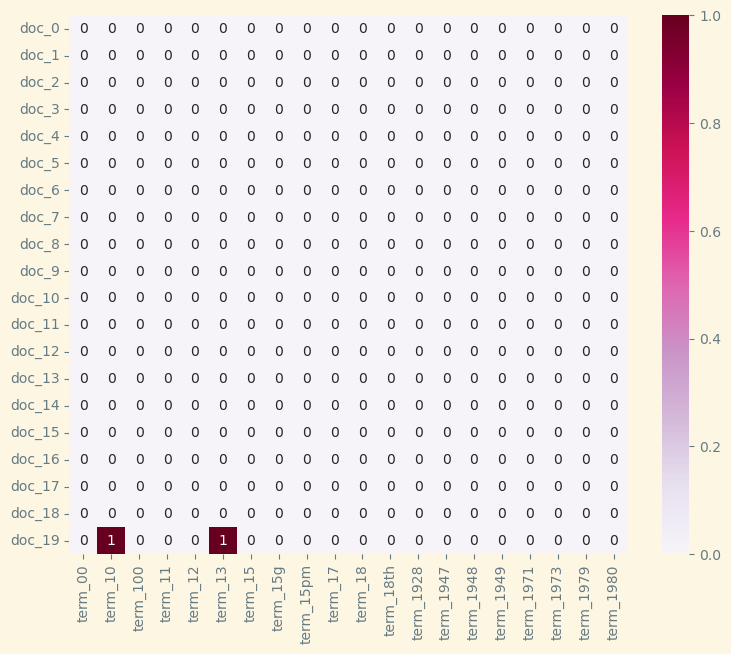

In [86]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [87]:
#5.4 Dimensionality REduction 

from sklearn.decomposition import PCA

print(usr_counts.shape)
usr_reduced = PCA(n_components = 2).fit_transform(usr_counts.toarray())
print(usr_reduced.shape) 

sentiment_name

(2714, 5153)
(2714, 2)


['Positive', 'Negative']

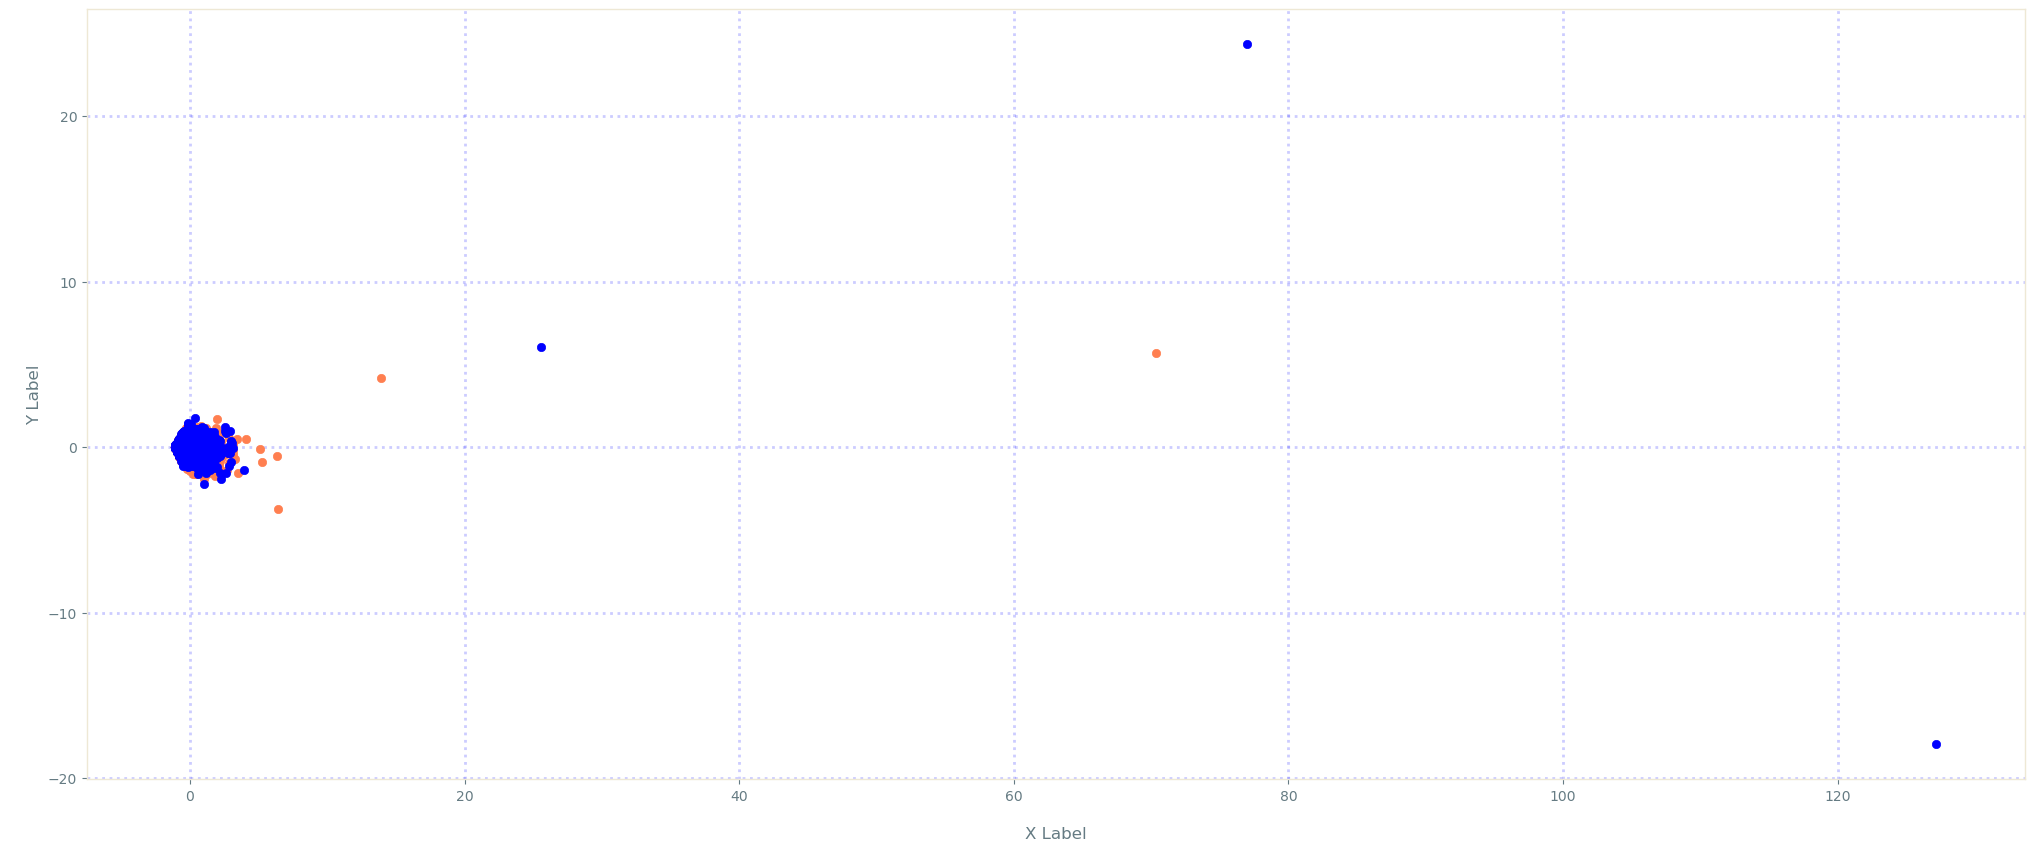

In [88]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10)) 
fig.set_facecolor('white')  # Set the background color to light gray
ax = fig.subplots()

for c, category in zip(col, sentiments):
    xs = usr_reduced[usr['sentiment_name'] == category].T[0]
    ys = usr_reduced[usr['sentiment_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o') 
    
ax.set_facecolor('white')
ax.grid(color='blue', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2714, 5153)
(2714, 3)
[[-0.81980663  0.053175   -0.13660295]
 [ 0.93244477 -0.2774358   0.95086379]
 [ 2.28833676 -1.91364989  0.88758139]
 ...
 [-0.51567053 -0.5777032  -0.41517661]
 [ 0.30817678 -0.75715752 -0.20913   ]
 [ 2.16875905  0.35123059  0.71051811]]


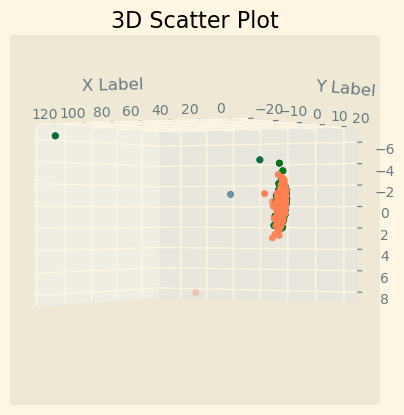

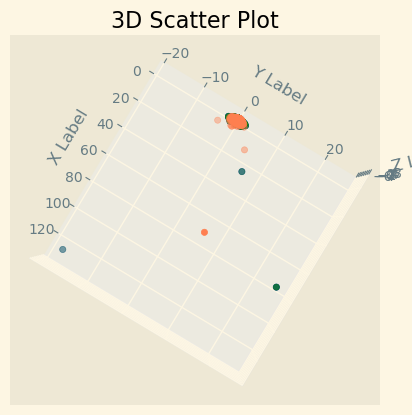

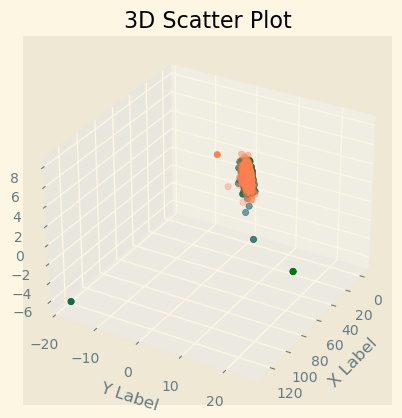

In [89]:
#EXERCISE 12  
print(usr_counts.shape)
usr_reduced = PCA(n_components = 3).fit_transform(usr_counts.toarray())
print(usr_reduced.shape)
print(usr_reduced) 

# plot 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, sentiments):
    x = usr_reduced[usr['sentiment_name'] == category].T[0]
    y = usr_reduced[usr['sentiment_name'] == category].T[1]
    z = usr_reduced[usr['sentiment_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=180, azim=60)

# plot 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, sentiments):
    x = usr_reduced[usr['sentiment_name'] == category].T[0]
    y = usr_reduced[usr['sentiment_name'] == category].T[1]
    z = usr_reduced[usr['sentiment_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=90, azim=30)

# plot3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

for c, category in zip(col, sentiments):
    x = usr_reduced[usr['sentiment_name'] == category].T[0]
    y = usr_reduced[usr['sentiment_name'] == category].T[1]
    z = usr_reduced[usr['sentiment_name'] == category].T[2]
    ax.scatter(x, y, z, c=c, marker='o')

# Create the 3D scatter plot
ax.scatter(x, y, z, c='green')

# Customize the plot labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=30, azim=30)

plt.show()

In [90]:
#5.5 Attribute Transformation/ Aggregation 

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(usr_counts.shape[1])
for j in range(0,usr_counts.shape[1]):
    term_frequencies.append(sum(usr_counts[:,j].toarray())) 
    
term_frequencies = np.asarray(usr_counts.sum(axis=0))[0]

5153


In [91]:
term_frequencies[0] #sum of first term

1

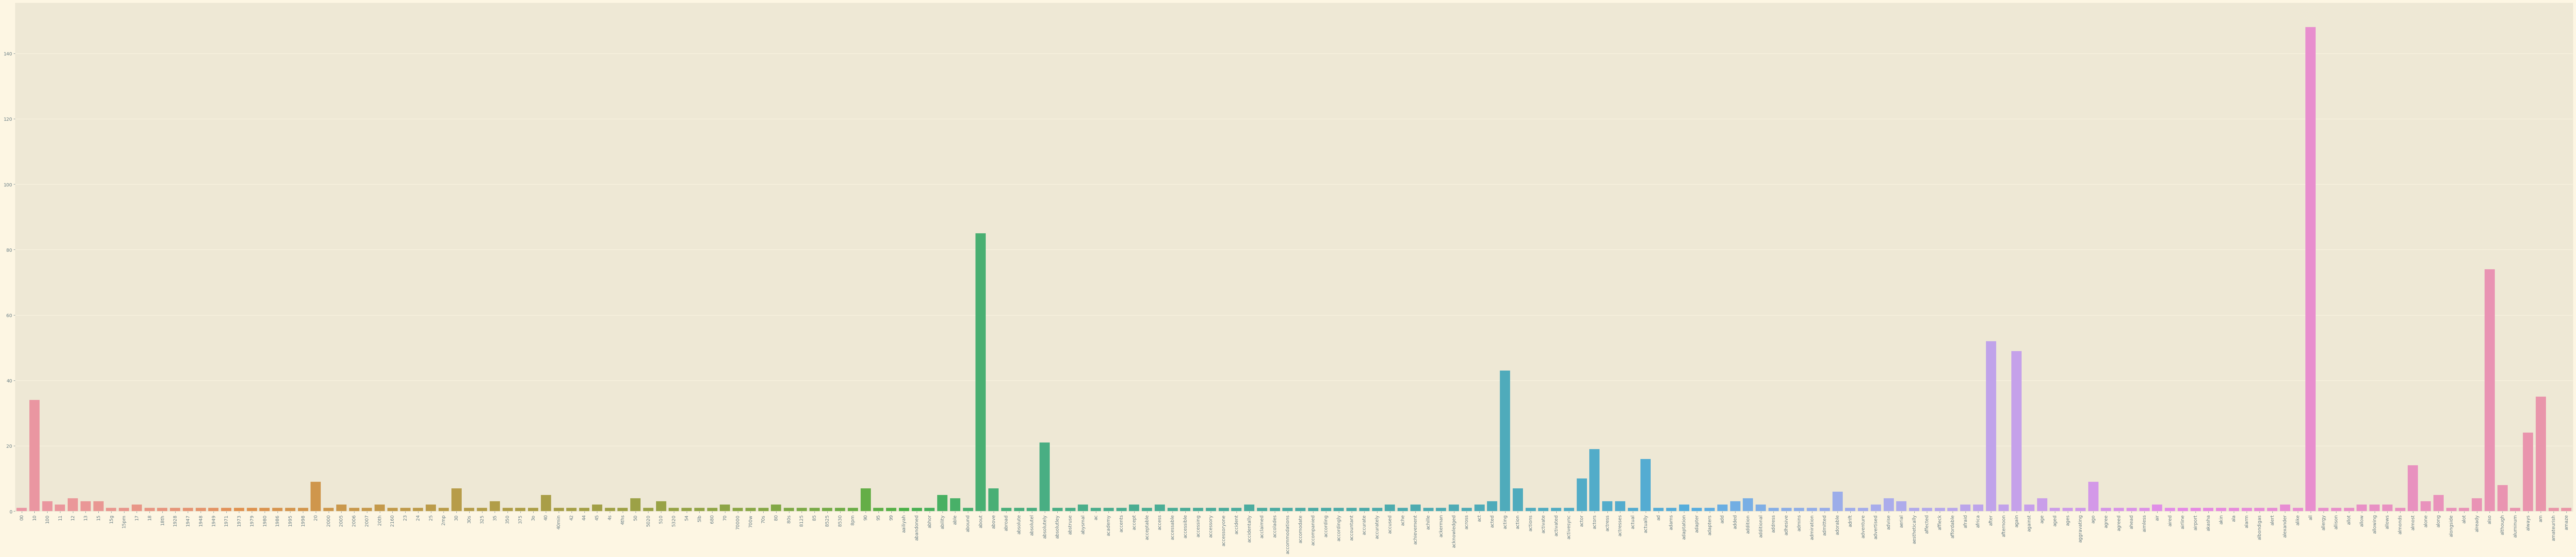

In [92]:
plt.subplots(figsize=(100, 20))
g = sns.barplot(x=count_vect.get_feature_names_out()[:200], 
            y=term_frequencies[:200])
g.set_xticklabels(count_vect.get_feature_names_out()[:200], rotation = 90);

ax.set_facecolor('white') 

In [93]:
#5.6 Discretization and Binarization 

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(usr.sentiment)
usr['bin_sentiment'] = mlb.transform(usr['sentiment']).tolist() 
usr[0:9]

text  sentiment  \
0  A very, very, very slow-moving, aimless movie ...          0   
1  Not sure who was more lost - the flat characte...          0   
2  Attempting artiness with black & white and cle...          0   
3       Very little music or anything to speak of.            0   
4  The best scene in the movie was when Gerardo i...          1   
5  The rest of the movie lacks art, charm, meanin...          0   
6                                Wasted two hours.            0   
7  Saw the movie today and thought it was a good ...          1   
8                               A bit predictable.            0   

  sentiment_name                                           unigrams  \
0       Negative  [A, very, ,, very, ,, very, slow-moving, ,, ai...   
1       Negative  [Not, sure, who, was, more, lost, -, the, flat...   
2       Negative  [Attempting, artiness, with, black, &, white, ...   
3       Negative  [Very, little, music, or, anything, to, speak,...   
4       Positive  [The, best, scene, in, the, movie, was, when, ...   
5       Negative  [The, rest, of, the, movie, lacks, art, ,, cha...   
6       Negative                            [Wasted, two, hours, .]   
7       Positive  [Saw, the, movie, today, and, thought, it, was...   
8       Negative                           [A, bit, predictable, .]   

  bin_sentiment  
0           [0]  
1           [0]  
2           [0]  
3           [0]  
4           [1]  
5           [0]  
6           [0]  
7           [1]  
8           [0]

In [94]:
#EXERCISE 16 Binarization on sentiment_name column 

mlb.fit(usr.sentiment_name)

usr['bin_sentiment_name'] = mlb.transform(usr['sentiment_name']).tolist() 

usr[0:9]

#Binarization on the sentiment_name column actually works the same as binarization using the sentiment column 

text  sentiment  \
0  A very, very, very slow-moving, aimless movie ...          0   
1  Not sure who was more lost - the flat characte...          0   
2  Attempting artiness with black & white and cle...          0   
3       Very little music or anything to speak of.            0   
4  The best scene in the movie was when Gerardo i...          1   
5  The rest of the movie lacks art, charm, meanin...          0   
6                                Wasted two hours.            0   
7  Saw the movie today and thought it was a good ...          1   
8                               A bit predictable.            0   

  sentiment_name                                           unigrams  \
0       Negative  [A, very, ,, very, ,, very, slow-moving, ,, ai...   
1       Negative  [Not, sure, who, was, more, lost, -, the, flat...   
2       Negative  [Attempting, artiness, with, black, &, white, ...   
3       Negative  [Very, little, music, or, anything, to, speak,...   
4       Positive  [The, best, scene, in, the, movie, was, when, ...   
5       Negative  [The, rest, of, the, movie, lacks, art, ,, cha...   
6       Negative                            [Wasted, two, hours, .]   
7       Positive  [Saw, the, movie, today, and, thought, it, was...   
8       Negative                           [A, bit, predictable, .]   

  bin_sentiment bin_sentiment_name  
0           [0]                [0]  
1           [0]                [0]  
2           [0]                [0]  
3           [0]                [0]  
4           [1]                [1]  
5           [0]                [0]  
6           [0]                [0]  
7           [1]                [1]  
8           [0]                [0]

In [95]:
#6. Data Exploration  

#We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = usr.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = usr.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = usr.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The movie was so boring, that I sometimes found myself occupied peaking in the paper instead of watching (never happened during a Columbo movie before!  ']
["I don't think I've ever gone to a movie and disliked it as much.  "]
['Everything about this movie is stupid.  ']


In [96]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [97]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.111111
Cosine Similarity using count bw 1 and 3: 0.157135
Cosine Similarity using count bw 2 and 3: 0.117851
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


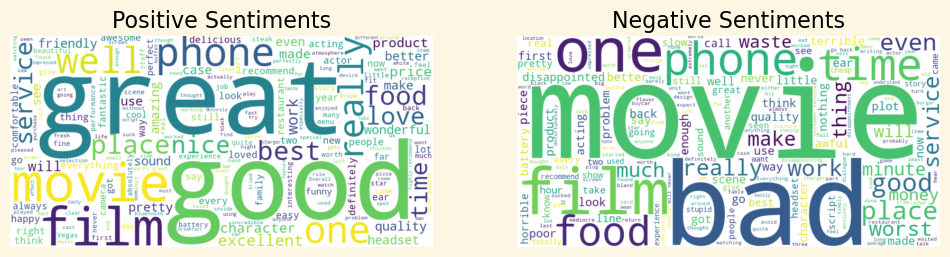

In [99]:
#NEW VISULIZATION 

#Generate word cloud for Postive and Negative sentiments to visualize which word are used the most based on user sentiment 

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create DataFrames for positive and negative sentiments
positive_sentiments = usr[usr['sentiment_name'] == 'Positive']
negative_sentiments = usr[usr['sentiment_name'] == 'Negative'] 

# Generate a word cloud for positive sentiments
positive_text = ' '.join(positive_sentiments['text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate a word cloud for negative sentiments
negative_text = ' '.join(negative_sentiments['text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

background_color = 'lightgray'

# Display the word clouds using Matplotlib
plt.figure(figsize=(12, 6))

ax.set_facecolor('white') 

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiments")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiments")
plt.axis('off')

plt.show()


4       108
7        79
9        59
10       36
11       78
       ... 
2647     28
2649     97
2655     55
2657     37
2670     70
Name: text, Length: 1366, dtype: int64


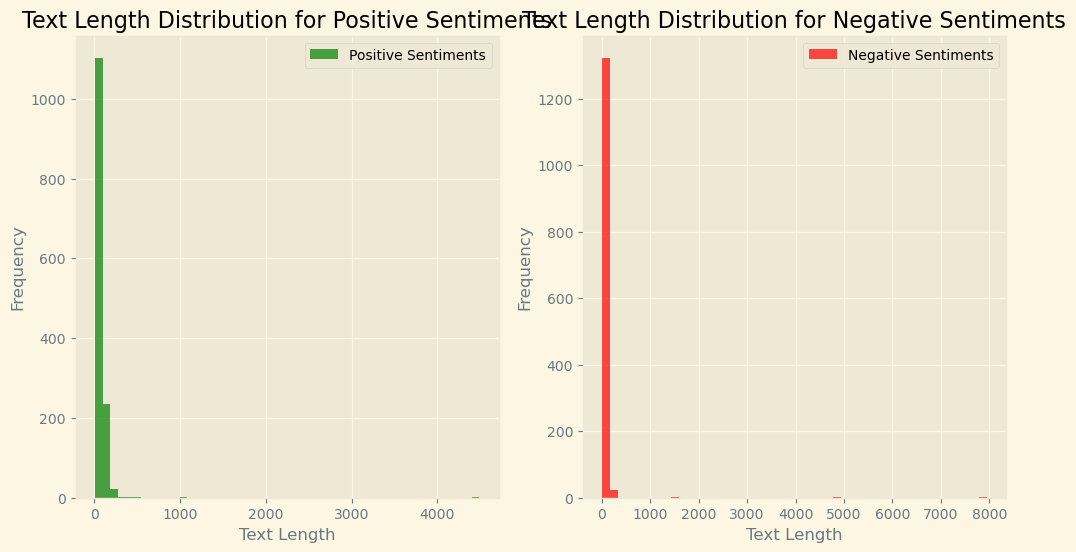

In [100]:
#NEW VISUALIZATION 
#SENTIMENT BY LENGTH 

import matplotlib.pyplot as plt

# Separate text data for positive and negative sentiments
positive_text = usr[usr['sentiment_name'] == 'Positive']['text']
negative_text = usr[usr['sentiment_name'] == 'Negative']['text']

# Calculate the lengths of text for both sentiments
positive_lengths = positive_text.apply(len)
negative_lengths = negative_text.apply(len)

print(positive_lengths)

plt.figure(figsize=(12, 6))
ax.set_facecolor('white') 

plt.subplot(1, 2, 1)
plt.hist(positive_lengths, bins=50, color='g', alpha=0.7, label='Positive Sentiments')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution for Positive Sentiments')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(negative_lengths, bins=50, color='r', alpha=0.7, label='Negative Sentiments')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution for Negative Sentiments')
plt.legend()

plt.show()

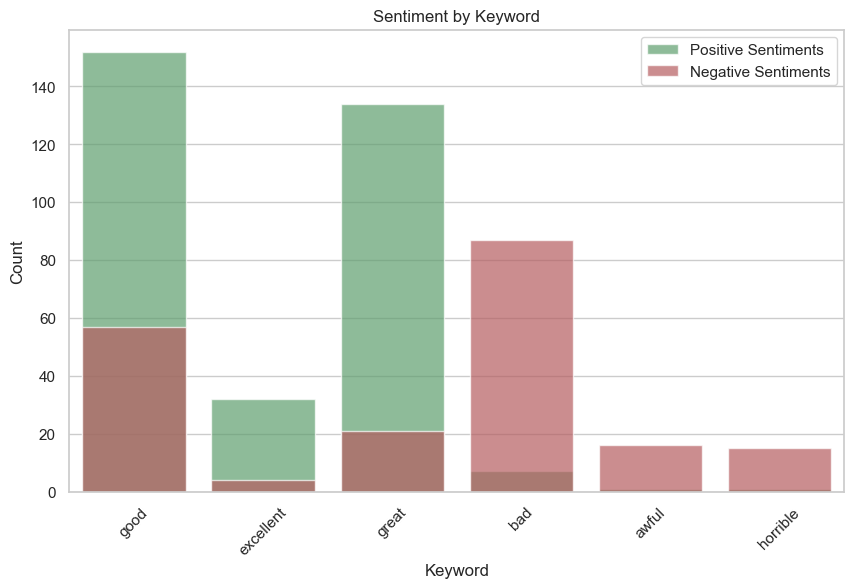

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# keywords to analyze
keywords = ["good", "excellent", "great", "bad", "awful", "horrible"]

positive_counts = []
negative_counts = []

for keyword in keywords:
    positive_count = usr[usr['sentiment_name'] == 'Positive']['text'].str.count(keyword).sum()
    negative_count = usr[usr['sentiment_name'] == 'Negative']['text'].str.count(keyword).sum()
    
    positive_counts.append(positive_count)
    negative_counts.append(negative_count)

keyword_counts_df = pd.DataFrame({'Keyword': keywords, 'Positive': positive_counts, 'Negative': negative_counts})

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=keyword_counts_df, x='Keyword', y='Positive', color='g', alpha=0.7, label='Positive Sentiments')
sns.barplot(data=keyword_counts_df, x='Keyword', y='Negative', color='r', alpha=0.7, label='Negative Sentiments')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Sentiment by Keyword')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [102]:
#TF-IDF 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to generate TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(usr['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.head())

    00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  yum  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   

   yummy  yun  z500a  zero  zillion  zombie  zombiez  
0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[5 rows x 5153 columns]


In [103]:
#NAIVE BAYES CLASSIFIER 

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(usr['text'], usr['sentiment_name'], test_size=0.2, random_state=42)

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_count = MultinomialNB()
nb_tfidf = MultinomialNB()

# Fit the classifiers
nb_count.fit(X_train_count, y_train)
nb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_count = nb_count.predict(X_test_count)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate and compare the classifiers
accuracy_count = accuracy_score(y_test, y_pred_count)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

report_count = classification_report(y_test, y_pred_count)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("Word Frequency Classifier:")
print(f"Accuracy: {accuracy_count}")
print(report_count)

print("\nTF-IDF Classifier:")
print(f"Accuracy: {accuracy_tfidf}")
print(report_tfidf)

Word Frequency Classifier:
Accuracy: 0.7955801104972375
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81       287
    Positive       0.79      0.77      0.78       256

    accuracy                           0.80       543
   macro avg       0.80      0.79      0.79       543
weighted avg       0.80      0.80      0.80       543


TF-IDF Classifier:
Accuracy: 0.8268876611418048
              precision    recall  f1-score   support

    Negative       0.86      0.80      0.83       287
    Positive       0.80      0.85      0.82       256

    accuracy                           0.83       543
   macro avg       0.83      0.83      0.83       543
weighted avg       0.83      0.83      0.83       543



In [104]:
##### END ####